In [1]:







from preprocess import Data_From_File
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import torch.nn as nn

# test_data = pd.DataFrame(Data_From_File.open_file(r'train_istella.pkl'))
# train_data = pd.DataFrame(Data_From_File.open_file('datas_full_30k_2_vali.pkl'))
# test_data

In [2]:
import pickle
import matplotlib
import matplotlib.pyplot as plt

params = {'legend.fontsize': 15,
          'legend.handlelength': 2,
          "axes.labelsize": 15,
          "xtick.labelsize": 15,
          "ytick.labelsize": 15,
          "lines.linewidth": 1.5,
           "axes.titlesize":15,
         'font.size': 22}
matplotlib.rcParams.update(params)

In [3]:
def make_graphic(file = r'/home/aletovv/Learning-To-Rank/prev_exps/3 deg 5 exps loss and metric parammodel 512;2;2;512;136;0.35'):
    with open(file, 'rb') as f:
        loss, metrics = pickle.load(f)
    num_exp = len(loss)
    metric = {'ndcg@5':[],
              'ndcg@10':[],
              'ndcg full':[]}
    for i in range(num_exp):
        for key in metric.keys():
            metric[key].append(metrics[i][key])
            
        
    ep = len(loss[0])
    print(ep)
    means, stds = {}, {}
    for key in metric.keys():
        
        y = np.array(metric[key])
        print(y.shape)
        # yy = np.zeros((4,50))
        # k = 4
        # yy[:k,:] = y[:k,:]
        # yy[k:,:] = y[(k+1):,:]
        
        means[key] = y.mean(
            0)
        stds[key] = (y.std(0))
        metric[key] = y
    fig, axes = plt.subplots(1,len(metric.keys()), figsize = (15,5))
    for i, key in enumerate(metric.keys()):
        axes[i].plot(range(ep), means[key])
        axes[i].fill_between(range(ep), means[key] - stds[key], means[key] + stds[key], alpha = 0.2)
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()
    return stds, means
     
        

In [4]:
def make_graphic_loss(file = r'/home/aletovv/Learning-To-Rank/prev_exps/3 deg 5 exps loss and metric parammodel 512;2;2;512;136;0.35'):
    with open(file, 'rb') as f:
        losses, metrics = pickle.load(f)
    num_exp = len(losses)                    
    ep = len(losses[0])
    print(ep)
    means, stds = {}, {}
    loss = losses[0]
    for key in range(1,5):
        loss = np.vstack((loss, losses[key]))
    # print(y.shape)
    # yy = np.zeros((4,50))
    # k = 4
    # yy[:k,:] = y[:k,:]
    # yy[k:,:] = y[(k+1):,:]
    y = loss
    means = y.mean(0)
    stds = y.std(0)
    loss = y
    plt.plot(range(len(means)),means)
    plt.fill_between(range(len(loss[0])),means - stds, means + stds, alpha = 0.2)
    plt.tight_layout()
    plt.show()
    return stds, means
     

3
(5, 3)
(5, 3)
(5, 3)


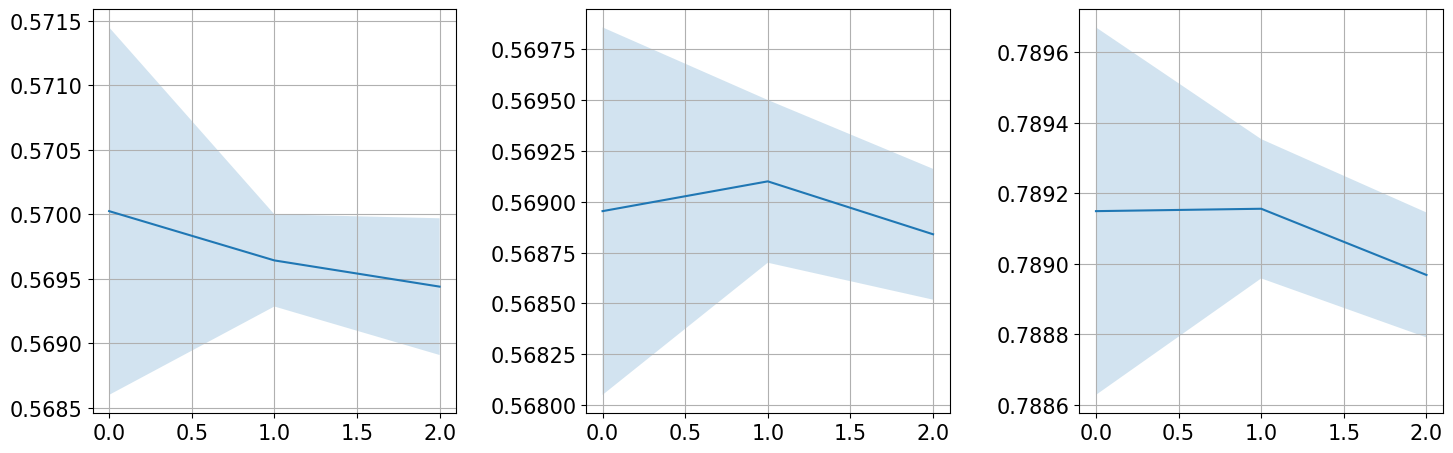

In [41]:
stds1, means1 = make_graphic(file =r'/home/aletovv/Learning-To-Rank/Transformer/ft 10k.pkl' )

In [42]:
print(np.max(means1['ndcg full']))
print(stds1['ndcg full'][np.argmax(means1['ndcg full'])])
# print(stds1['ndcg@5'][1])

0.7891560572486072
0.00019738773470847249


40


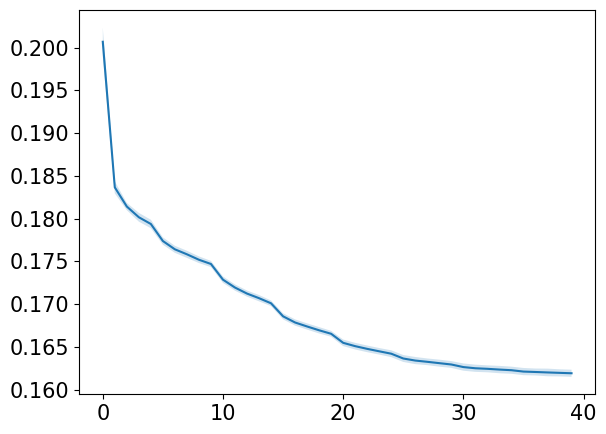

In [43]:
stds2, means2 = make_graphic_loss(file = r'/home/aletovv/Learning-To-Rank/Transformer/p+2.3l*0.01 4;4;0.3')

50


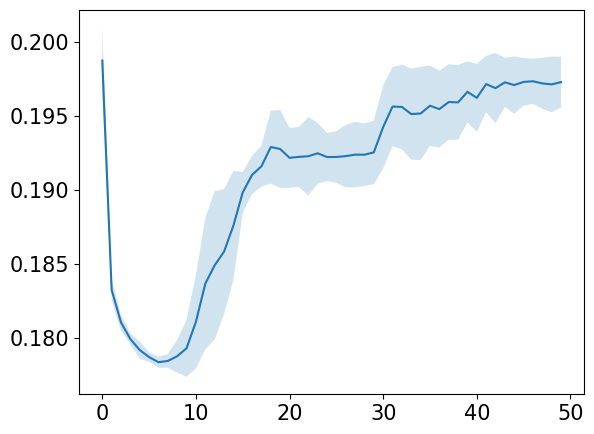

In [44]:
stds3, means3 = make_graphic_loss(r'/home/aletovv/Learning-To-Rank/Transformer/point + 2.3l * 0.01 4 4 0.3')

40
(5, 40)
(5, 40)
(5, 40)


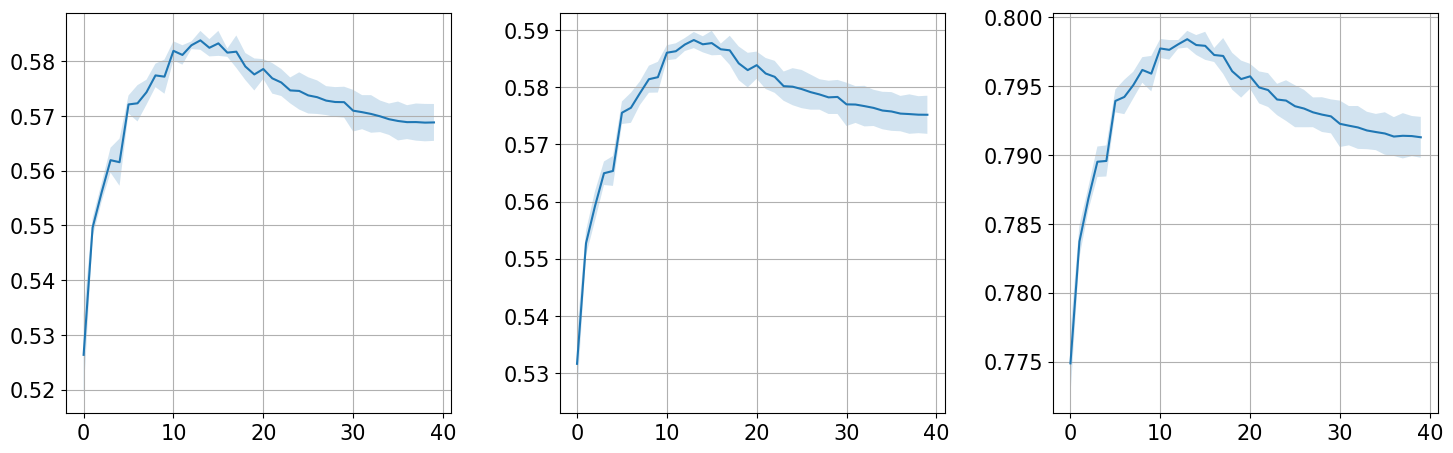

In [45]:

stds4, means4 = make_graphic(r'/home/aletovv/Learning-To-Rank/Transformer/p+2.3l*0.01 4;4;0.3')

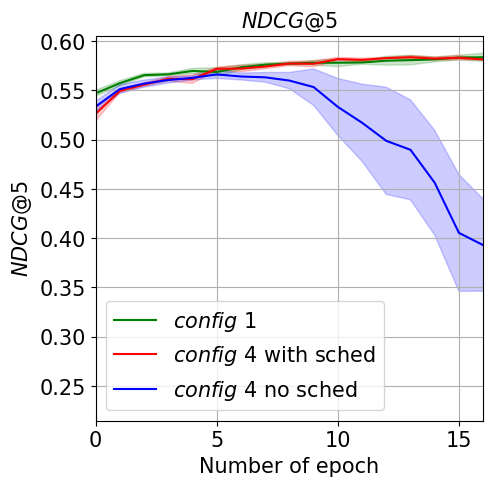

In [40]:
key = 'ndcg@5'
# key = 'ndcg@10'
# key = 'ndcg full'
plt.figure(figsize = (5,5))
# $\mathcal{L}_{CE} + 0.01\mathcal{L}_{LN}$
plt.plot(range(len(means1[key])),means1[key], label = r'$config$ $1$', color = 'green' )
plt.plot(range(len(means2[key])),means2[key], label = r'$config$ $4$ with sched', color = 'red' )
plt.plot(range(len(means3[key])),means3[key], label = r'$config$ $4$ no sched',color = 'blue' )
# plt.plot(range(len(means4[key])),means4[key], label = r'$config$ $4$',color = 'purple')

plt.fill_between(range(len(means1[key])), means1[key] - stds1[key], means1[key] + stds1[key], alpha = 0.2, color = 'green')
plt.fill_between(range(len(means2[key])), means2[key] - stds2[key], means2[key] + stds2[key], alpha = 0.2, color = 'red')
plt.fill_between(range(len(means3[key])), means3[key] - stds3[key], means3[key] + stds3[key], alpha = 0.2, color = 'blue')
# plt.fill_between(range(len(means4[key])), means4[key] - stds4[key], means4[key] + stds4[key], alpha = 0.2, color = 'purple')

plt.grid()
plt.xlim(0,16)
plt.legend()
plt.ylabel(f'${key.upper()}$') if len(key.split()) <= 1 else plt.ylabel(r'$NDCG$')
# plt.ylim(0.56,0.595)
plt.xlabel('Number of epoch')

plt.title(f'${key.upper()}$') if len(key.split()) <= 1 else plt.title(r'$NDCG$')
plt.savefig(f'Loss archs metric comparison.pdf',bbox_inches='tight', format = 'pdf')

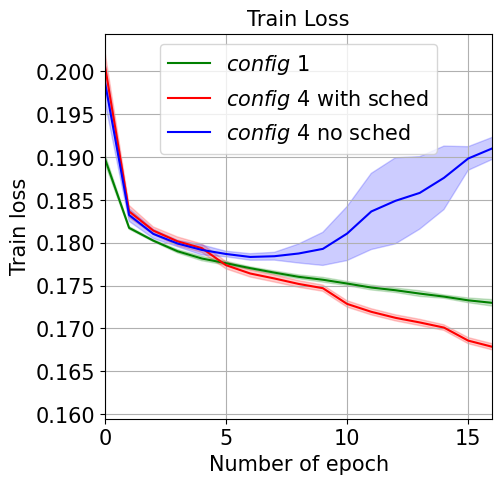

In [46]:
key = 'ndcg@5'
# key = 'ndcg@10'
# key = 'ndcg full'
plt.figure(figsize = (5,5))
# $\mathcal{L}_{CE} + 0.01\mathcal{L}_{LN}$
plt.plot(range(len(means1)),means1, label = r'$config$ $1$', color = 'green' )
plt.plot(range(len(means2)),means2, label = r'$config$ $4$ with sched', color = 'red' )
plt.plot(range(len(means3)),means3, label = r'$config$ $4$ no sched',color = 'blue' )
# plt.plot(range(len(means4)),means4, label = r'$config$ $4$',color = 'purple')

plt.fill_between(range(len(means1)), means1 - stds1, means1 + stds1, alpha = 0.2, color = 'green')
plt.fill_between(range(len(means2)), means2 - stds2, means2 + stds2, alpha = 0.2, color = 'red')
plt.fill_between(range(len(means3)), means3 - stds3, means3 + stds3, alpha = 0.2, color = 'blue')
# plt.fill_between(range(len(means4)), means4 - stds4, means4 + stds4, alpha = 0.2, color = 'purple')

plt.grid()
plt.xlim(0,16)
plt.legend()
plt.ylabel(f'Train loss')
# plt.ylim(0.56,0.595)
plt.xlabel('Number of epoch')

plt.title(f'Train Loss')
plt.savefig(f'Loss archs comparison.pdf',bbox_inches='tight', format = 'pdf')

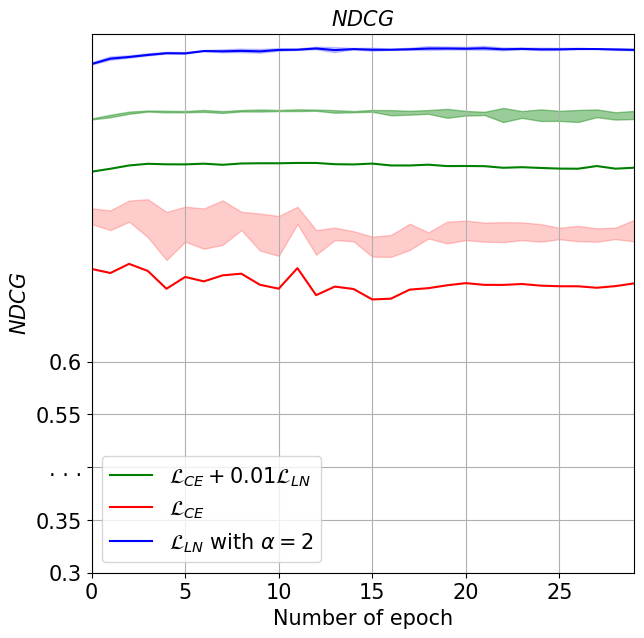

In [488]:
key = 'ndcg@5'
key = 'ndcg@10'
key = 'ndcg full'
plt.figure(figsize = (7,7))
# $\mathcal{L}_{CE} + 0.01\mathcal{L}_{LN}$
plt.plot(range(len(means1[key])), means1[key]-0.05, label = r'$\mathcal{L}_{CE} + 0.01\mathcal{L}_{LN}$', color = 'green' )
plt.plot(range(len(means2[key])),means2[key]-0.05, label = r'$\mathcal{L}_{CE}$', color = 'red')
plt.plot(range(len(means3[key])),means3[key] + 0.05, label = r'$\mathcal{L}_{LN}$ with $\alpha = 2$',color = 'blue' )
# plt.plot(range(len(means4[key])),means4[key], label = r'architecture $4$',color = 'red' , linewidth = 1)

plt.fill_between(range(len(means1[key])), means1[key] - stds1[key], means1[key] + stds1[key], alpha = 0.4, color = 'green')
plt.fill_between(range(len(means2[key])), means2[key] - stds2[key], means2[key] + stds2[key], alpha = 0.2, color = 'red')
plt.fill_between(range(len(means3[key])), 0.05+means3[key] - stds3[key], 0.05+means3[key] + stds3[key], alpha = 0.2, color = 'blue')
# plt.fill_between(range(len(means4[key])), means4[key] - stds4[key], means4[key] + stds4[key], alpha = 0.2, color = 'red')

plt.grid()
plt.xlim(0,29)
plt.legend()
plt.ylabel(f'${key.upper()}$') if len(key.split()) <= 1 else plt.ylabel(r'$NDCG$')
# plt.ylim(0.56,0.595)
plt.xlabel('Number of epoch')

# [0.625, 0.650]
plt.yticks(ticks=[0.35, 0.4, 0.45,0.5, 0.55],
           labels=[0.3, 0.35, '. . .', 0.55,0.6])

plt.title(f'${key.upper()}$') if len(key.split()) <= 1 else plt.title(r'$NDCG$')
plt.savefig(f'{key.upper().split()[0]} comp dropouts.pdf', format = 'pdf')

In [65]:
key = 'ndcg@5'
key.split()[0]

'ndcg@5'

In [31]:
ds = tfds.load("istella/s")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: 